In [1]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 3s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [2]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

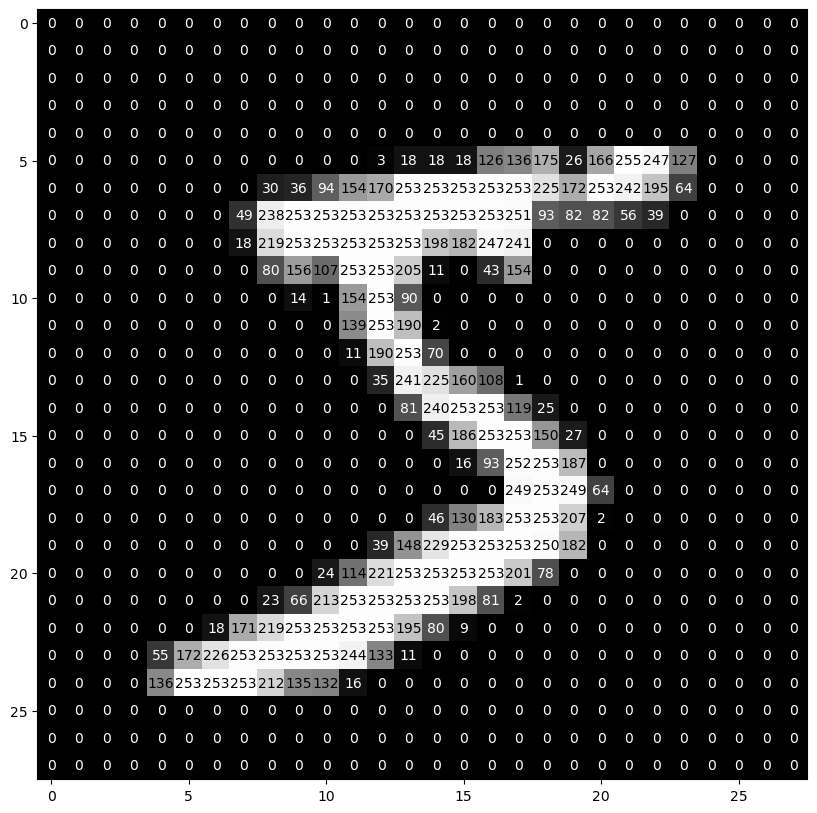

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(x_train[0], ax)

Text(0.5, 1.0, '[7]')

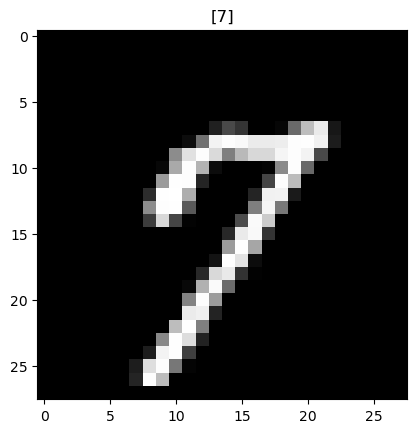

In [4]:
import random
import matplotlib.pyplot as plt
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray') # Color map
plt.title([y_train[i]])

In [5]:
# How many images are there in every digit?
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [6]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

In [7]:
# Normalization : Scaling down the value to a specific range(0-1)
x_train=x_train/255
x_test = x_test/255

# AFter Normalization
print(x_train.max())
print(x_train.min())

1.0
0.0


In [8]:
from keras.layers import Dense
from keras.layers import Flatten
model = keras.models.Sequential()
model.add(Flatten(input_shape=(28,28))) # 784
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2318 - accuracy: 0.9325 - val_loss: 0.1179 - val_accuracy: 0.9644
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0942 - accuracy: 0.9717 - val_loss: 0.0915 - val_accuracy: 0.9735
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0596 - accuracy: 0.9813 - val_loss: 0.0861 - val_accuracy: 0.9735
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0412 - accuracy: 0.9868 - val_loss: 0.0779 - val_accuracy: 0.9765
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0755 - val_accuracy: 0.9777
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0874 - val_accuracy: 0.9754
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.0825 - val_accuracy:

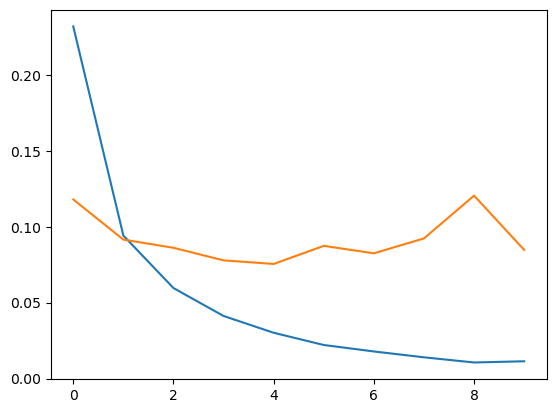

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

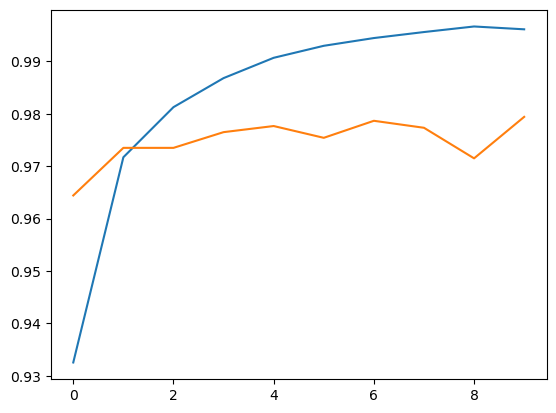

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1/1 [==============================] - 0s 89ms/step


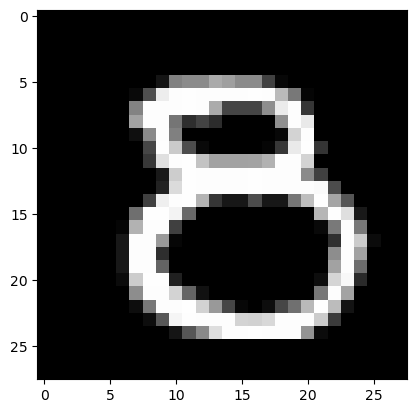

In [11]:
import keras.utils as image

img = image.load_img(path="8.png", color_mode= 'grayscale', target_size=(28, 28))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
#img_class = model.predict_classes(test_img)
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]

In [12]:
prediction

8

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
accuracy_score(y_pred,y_test)

313/313 [==============================] - 1s 2ms/step


0.9811

In [14]:
confusion_matrix(y_pred,y_test)

array([[ 975,    0,    8,    1,    1,    1,    5,    2,    6,    6],
       [   0, 1128,    2,    0,    2,    0,    3,    4,    0,    4],
       [   0,    1, 1000,    1,    2,    0,    0,    6,    1,    0],
       [   0,    2,    3,  991,    0,    5,    1,    2,    3,    3],
       [   0,    0,    3,    0,  957,    1,    3,    1,    3,    3],
       [   1,    1,    1,    6,    2,  876,    4,    0,    2,    1],
       [   2,    1,    1,    0,    5,    3,  942,    0,    2,    0],
       [   1,    1,    6,    4,    1,    0,    0, 1003,    3,    2],
       [   1,    1,    8,    5,    2,    4,    0,    3,  952,    3],
       [   0,    0,    0,    2,   10,    2,    0,    7,    2,  987]],
      dtype=int64)

In [15]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1005
           1       0.99      0.99      0.99      1143
           2       0.97      0.99      0.98      1011
           3       0.98      0.98      0.98      1010
           4       0.97      0.99      0.98       971
           5       0.98      0.98      0.98       894
           6       0.98      0.99      0.98       956
           7       0.98      0.98      0.98      1021
           8       0.98      0.97      0.97       979
           9       0.98      0.98      0.98      1010

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [16]:
model.save("mnist.hdf5")